# Smart Classroom

<font color='blue'>by Trang Thanh Vu, Savita Gopalakrishna Pillay, Christian Bauer, Alexander Frey and Diyar Takak</font>

# 1 Libraries

In [1]:
import numpy as np              ## mathematical functions and more
import matplotlib.pyplot as plt ## mainly intended for interactive plots and simple cases of programmatic plot generation
import matplotlib.dates as mdates
#import cv2                      ## opencv with algorithms for image processing and computer vision
import os                       ## provides a way of using operating system dependent functionality.
import random                   ## using randomization
import pickle                   ## storing data (binary)
import winsound                 ## sound 
import pandas as pd             ## data structures for data analysis, time series,and statistics
import tensorflow as tf         ## machine learning
import keras
from tensorflow.keras import layers
from unidecode import unidecode
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix 
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from functools import reduce

# 2 Color Scheme

In [2]:
colormap = {"0":"#A0001B",
            "1":"#FF8418",
            "2": "#525252",
            "3": "#1F77B4",
            "4":"#25C254",
            "5":"#B704D6",
            "6":"#99D9EA",
            "7":"#000000",
            "8":"#F0D123",
            "9": "#0797E3",
            }

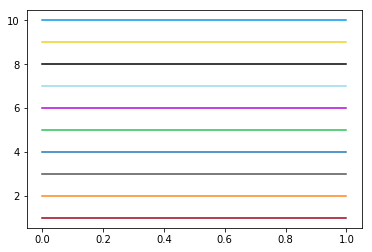

In [3]:
plt.plot([0,1], [1,1], color=colormap["0"])
plt.plot([0,1], [2,2], color=colormap["1"])
plt.plot([0,1], [3,3], color=colormap["2"])
plt.plot([0,1], [4,4], color=colormap["3"])
plt.plot([0,1], [5,5], color=colormap["4"])
plt.plot([0,1], [6,6], color=colormap["5"])
plt.plot([0,1], [7,7], color=colormap["6"])
plt.plot([0,1], [8,8], color=colormap["7"])
plt.plot([0,1], [9,9], color=colormap["8"])
plt.plot([0,1], [10,10], color=colormap["9"])

# 3 Data Preparation - Preprocessing

## Load Data

In [4]:
D1 = pd.read_csv("dataset/1.csv", sep=';',decimal =',')
D2 = pd.read_csv("dataset/2.csv", sep=';',decimal =',')
D3 = pd.read_csv("dataset/3.csv", sep=';',decimal =',')
D4 = pd.read_csv("dataset/4.csv", sep=';',decimal =',')
D5 = pd.read_csv("dataset/5.csv", sep=';',decimal =',')
D6 = pd.read_csv("dataset/6.csv", sep=';',decimal =',')
D7 = pd.read_csv("dataset/7.csv", sep=';',decimal =',')
D8 = pd.read_csv("dataset/8.csv", sep=';',decimal =',')
D9 = pd.read_csv("dataset/9.csv", sep=';',decimal =',')
D10 = pd.read_csv("dataset/10.csv", sep=';',decimal =',') ##Cases 10- 18 was added afterwords to enrich the Data Set 
D11= pd.read_csv("dataset/11.csv", sep=';',decimal =',')
D12 = pd.read_csv("dataset/12.csv", sep=';',decimal =',')
D13 = pd.read_csv("dataset/13.csv", sep=';',decimal =',')
D14 = pd.read_csv("dataset/14.csv", sep=';',decimal =',')
D15 = pd.read_csv("dataset/15.csv", sep=';',decimal =',')
D16 = pd.read_csv("dataset/16.csv", sep=';',decimal =',')
D17 = pd.read_csv("dataset/17.csv", sep=';',decimal =',')
D18 = pd.read_csv("dataset/18.csv", sep=';',decimal =',')

## Case 1 : Lecture + Durschnittliche Dichte Fenster

In [5]:
D1.head()

,start,ende,duration[min],room_val[m3],amount,activity_name,activity_level,air_exchange_rate,air_exchange_name,co2_concentration[ppm]
0,08:00,08:01,0,200,25,lecture,1.2,0.2,durschnittliche dichte fenster,644.372121
1,08:01,08:02,1,200,25,lecture,1.2,0.2,durschnittliche dichte fenster,688.596580
2,08:02,08:03,2,200,25,lecture,1.2,0.2,durschnittliche dichte fenster,732.673871
3,08:03,08:04,3,200,25,lecture,1.2,0.2,durschnittliche dichte fenster,776.604482
4,08:04,08:05,4,200,25,lecture,1.2,0.2,durschnittliche dichte fenster,820.388901


## Case 2 : Lecture + 1 von 3 gekippt

In [6]:
D2.head()

,start,ende,duration[min],room_val[m3],amount,activity_name,activity_level,air_exchange_rate,air_exchange_name,co2_concentration[ppm]
0,08:00,08:01,0,200,25,lecture,1.2,1,1 von 3 gekippt,600.000000
1,08:01,08:02,1,200,25,lecture,1.2,1,1 von 3 gekippt,641.433213
2,08:02,08:03,2,200,25,lecture,1.2,1,1 von 3 gekippt,682.181595
3,08:03,08:04,3,200,25,lecture,1.2,1,1 von 3 gekippt,722.256465
4,08:04,08:05,4,200,25,lecture,1.2,1,1 von 3 gekippt,761.668956


## Case 3 : Lecture + Alle Fenster gekippt

In [7]:
D3.head()

,start,ende,duration[min],room_val[m3],amount,activity_name,activity_level,air_exchange_rate,air_exchange_name,co2_concentration[ppm]
0,08:00,08:01,0,200,25,lecture,1.2,2,Alle Fenster gekippt,600.000000
1,08:01,08:02,1,200,25,lecture,1.2,2,Alle Fenster gekippt,637.812407
2,08:02,08:03,2,200,25,lecture,1.2,2,Alle Fenster gekippt,674.385177
3,08:03,08:04,3,200,25,lecture,1.2,2,Alle Fenster gekippt,709.758948
4,08:04,08:05,4,200,25,lecture,1.2,2,Alle Fenster gekippt,743.973029


## Case 4 : Discussion + durschnittliche dichte fenster	

In [8]:
D4.head()

,start,ende,duration[min],room_val[m3],amount,activity_name,activity_level,air_exchange_rate,air_exchange_name,co2_concentration[ppm]
0,08:00,08:01,0,200,25,discussion,2.1,0.2,durschnittliche dichte fenster,600.000000
1,08:01,08:02,1,200,25,discussion,2.1,0.2,durschnittliche dichte fenster,678.226973
2,08:02,08:03,2,200,25,discussion,2.1,0.2,durschnittliche dichte fenster,756.193624
3,08:03,08:04,3,200,25,discussion,2.1,0.2,durschnittliche dichte fenster,833.900819
4,08:04,08:05,4,200,25,discussion,2.1,0.2,durschnittliche dichte fenster,911.349421


## Case 5 : Discussion + 1 von 3 gekippt

In [9]:
D5.head()

,start,ende,duration[min],room_val[m3],amount,activity_name,activity_level,air_exchange_rate,air_exchange_name,co2_concentration[ppm]
0,08:00,08:01,0,200,25,discussion,2.1,1,1 von 3 gekippt,600.000000
1,08:01,08:02,1,200,25,discussion,2.1,1,1 von 3 gekippt,675.063491
2,08:02,08:03,2,200,25,discussion,2.1,1,1 von 3 gekippt,748.886291
3,08:03,08:04,3,200,25,discussion,2.1,1,1 von 3 gekippt,821.488908
4,08:04,08:05,4,200,25,discussion,2.1,1,1 von 3 gekippt,892.891509


## Case 6 : Discussion + Alle Fenster gekippt

In [10]:
D6.head()

,start,ende,duration[min],room_val[m3],amount,activity_name,activity_level,air_exchange_rate,air_exchange_name,co2_concentration[ppm]
0,08:00,08:01,0,200,25,discussion,2.1,2,Alle Fenster gekippt,600.000000
1,08:01,08:02,1,200,25,discussion,2.1,2,Alle Fenster gekippt,671.164756
2,08:02,08:03,2,200,25,discussion,2.1,2,Alle Fenster gekippt,739.996453
3,08:03,08:04,3,200,25,discussion,2.1,2,Alle Fenster gekippt,806.571579
4,08:04,08:05,4,200,25,discussion,2.1,2,Alle Fenster gekippt,870.964113


## Case 7 : Groupwork + durschnittliche dichte fenster

In [11]:
D7.head()

,start,ende,duration[min],room_val[m3],amount,activity_name,activity_level,air_exchange_rate,air_exchange_name,co2_concentration[ppm]
0,08:00,08:01,0,200,25,exam,4.8,0.2,durschnittliche dichte fenster,600.000000
1,08:01,08:02,1,200,25,exam,4.8,0.2,durschnittliche dichte fenster,779.331964
2,08:02,08:03,2,200,25,exam,4.8,0.2,durschnittliche dichte fenster,958.067149
3,08:03,08:04,3,200,25,exam,4.8,0.2,durschnittliche dichte fenster,1136.207543
4,08:04,08:05,4,200,25,exam,4.8,0.2,durschnittliche dichte fenster,1313.755124


## Case 8 : Groupwork + 1 von 3 gekippt

In [12]:
D8.head()

,start,ende,duration[min],room_val[m3],amount,activity_name,activity_level,air_exchange_rate,air_exchange_name,co2_concentration[ppm]
0,08:00,08:01,0,200,25,exam,4.8,1,1 von 3 gekippt,600.000000
1,08:01,08:02,1,200,25,exam,4.8,1,1 von 3 gekippt,775.497806
2,08:02,08:03,2,200,25,exam,4.8,1,1 von 3 gekippt,948.094887
3,08:03,08:04,3,200,25,exam,4.8,1,1 von 3 gekippt,1117.839191
4,08:04,08:05,4,200,25,exam,4.8,1,1 von 3 gekippt,1284.777867


## Case 9 : Groupwork + Alle Fenster gekippt

In [13]:
D9.head()

,start,ende,duration[min],room_val[m3],amount,activity_name,activity_level,air_exchange_rate,air_exchange_name,co2_concentration[ppm]
0,08:00,08:01,0,200,25,exam,4.8,2,Alle Fenster gekippt,600.000000
1,08:01,08:02,1,200,25,exam,4.8,2,Alle Fenster gekippt,770.769054
2,08:02,08:03,2,200,25,exam,4.8,2,Alle Fenster gekippt,935.939632
3,08:03,08:04,3,200,25,exam,4.8,2,Alle Fenster gekippt,1095.695275
4,08:04,08:05,4,200,25,exam,4.8,2,Alle Fenster gekippt,1250.213504


# D10-D18 follow the same data structure and contains different values in the room_val and the amount of people


## Merge Data + Type into Numeric Values

In [14]:
data_frames = [D1,D2,D3,D4,D5,D6,D7,D8,D9,D10, D11, D12,D13,D14,D15,D16,D17,D18]

In [15]:
D1.columns

Index(['start ', 'ende', 'duration[min]', 'room_val[m3]', 'amount',
       'activity_name', 'activity_level', 'air_exchange_rate',
       'air_exchange_name', 'co2_concentration[ppm]'],
      dtype='object')

In [16]:
for df in data_frames:
    
    df.drop(['start ','ende','activity_name','air_exchange_name'], axis=1, inplace=True)#get rid of unnecessary data
#result = pd.concat(data_frames, join='inner', axis=0)

In [17]:
df_merged = reduce(lambda  left,right: pd.merge(left,right,how='outer'), data_frames)

df_merged.head()

C:\Users\AF\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:963: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  'representation', UserWarning)
C:\Users\AF\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:963: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  'representation', UserWarning)
C:\Users\AF\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:963: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  'representation', UserWarning)
C:\Users\AF\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:963: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  'representation', UserWarning)
C:\Users\AF\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:963: UserWarning: You are m

,duration[min],room_val[m3],amount,activity_level,air_exchange_rate,co2_concentration[ppm]
0,0,200,25,1.2,0.2,644.372121
1,1,200,25,1.2,0.2,688.596580
2,2,200,25,1.2,0.2,732.673871
3,3,200,25,1.2,0.2,776.604482
4,4,200,25,1.2,0.2,820.388901


In [18]:
df_final =df_merged.sample(frac=1)
df_final.reset_index(drop=True, inplace=True)
df_final.head()

,duration[min],room_val[m3],amount,activity_level,air_exchange_rate,co2_concentration[ppm]
0,20,485,100,4.8,0.2,6139.647661
1,200,200,25,2.1,0.2,12038.214360
2,218,200,25,2.1,1.0,5021.424383
3,6,200,25,1.2,1.0,838.550412
4,96,85,10,1.2,2.0,1618.796258


In [19]:
df_final.columns

Index(['duration[min]', 'room_val[m3]', 'amount', 'activity_level',
       'air_exchange_rate', 'co2_concentration[ppm]'],
      dtype='object')

# 4 Machine Learning

Comment One Hot Encoding!
activity_level and air_exchange_rate could be labeled data?

## Correlation Analysis

In [20]:
displayDataset = df_final
def plotCorrelationMatrix(df, graphWidth):
    fsize=17
    #df = df.dropna('columns') 
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90,fontsize=fsize)
    plt.yticks(range(len(corr.columns)), corr.columns,fontsize=fsize)
    plt.gca().xaxis.tick_bottom()
    plt.gcf().autofmt_xdate()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix',fontsize=(fsize+3))
    plt.show()
    return corr

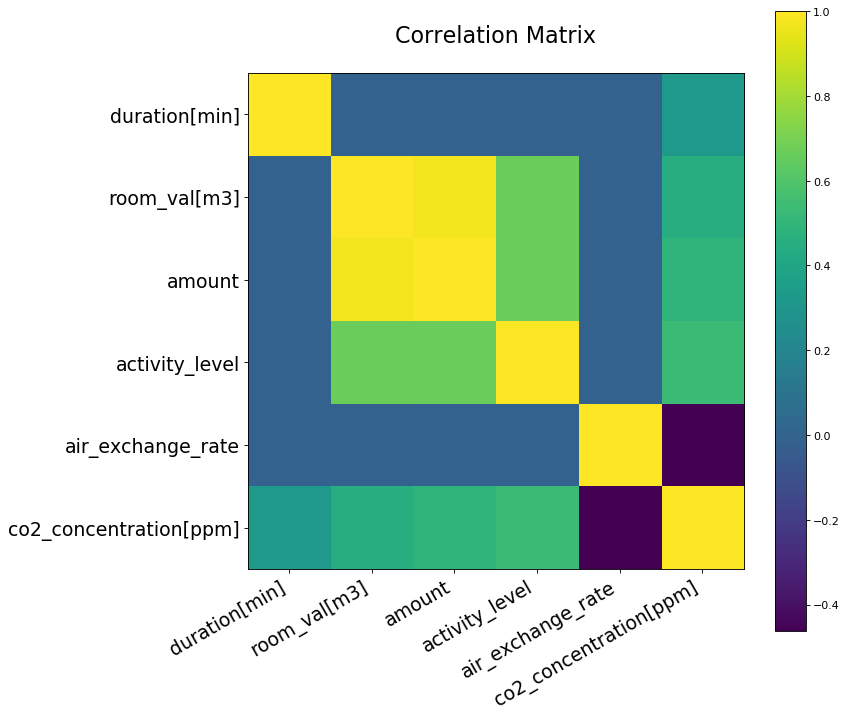

In [21]:
cor = plotCorrelationMatrix(displayDataset, 10)

In [22]:
cor

,duration[min],room_val[m3],amount,activity_level,air_exchange_rate,co2_concentration[ppm]
duration[min],1.000000e+00,0.000000e+00,0.000000e+00,2.131197e-18,4.176252e-18,0.324766
room_val[m3],0.000000e+00,1.000000e+00,9.722884e-01,6.712828e-01,-3.644128e-16,0.448596
amount,0.000000e+00,9.722884e-01,1.000000e+00,6.659121e-01,2.589316e-16,0.489317
activity_level,2.131197e-18,6.712828e-01,6.659121e-01,1.000000e+00,-5.034569e-17,0.533532
air_exchange_rate,4.176252e-18,-3.644128e-16,2.589316e-16,-5.034569e-17,1.000000e+00,-0.462576
co2_concentration[ppm],3.247664e-01,4.485955e-01,4.893173e-01,5.335321e-01,-4.625762e-01,1.000000


## Define X and Y for training and testing

In [23]:
X = df_final[["duration[min]",'room_val[m3]','amount',"activity_level","air_exchange_rate", "amount"]].values
y = df_final[["co2_concentration[ppm]"]].values

In [24]:
X

array([[2.00e+01, 4.85e+02, 1.00e+02, 4.80e+00, 2.00e-01, 1.00e+02],
       [2.00e+02, 2.00e+02, 2.50e+01, 2.10e+00, 2.00e-01, 2.50e+01],
       [2.18e+02, 2.00e+02, 2.50e+01, 2.10e+00, 1.00e+00, 2.50e+01],
       ...,
       [2.12e+02, 8.50e+01, 1.00e+01, 1.20e+00, 1.00e+00, 1.00e+01],
       [0.00e+00, 2.00e+02, 2.50e+01, 2.10e+00, 1.00e+00, 2.50e+01],
       [2.78e+02, 2.00e+02, 2.50e+01, 2.10e+00, 1.00e+00, 2.50e+01]])

In [25]:
y

array([[ 6139.647661],
       [12038.21436 ],
       [ 5021.424383],
       ...,
       [ 2866.955325],
       [  600.      ],
       [ 5097.292167]])

Dividing data into training and testing data

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

## Linear Regression

In [27]:
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [28]:
model.score(X_test,y_test)

0.6661698537703906

Text(0.5,1,'Scatter Plot')

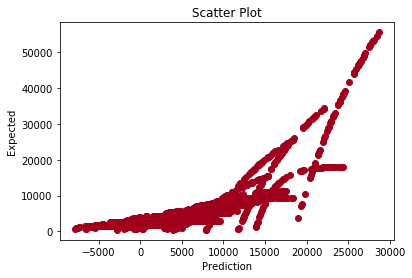

In [29]:
plt.plot(y_pred,y_test,'o', color=colormap["0"])
plt.xlabel('Prediction')
plt.ylabel('Expected')
plt.title('Scatter Plot')

# Classification

## Decision tree

In [30]:
df_classification  = df_final
df_classification.head()

,duration[min],room_val[m3],amount,activity_level,air_exchange_rate,co2_concentration[ppm]
0,20,485,100,4.8,0.2,6139.647661
1,200,200,25,2.1,0.2,12038.214360
2,218,200,25,2.1,1.0,5021.424383
3,6,200,25,1.2,1.0,838.550412
4,96,85,10,1.2,2.0,1618.796258


In [31]:
length_df = len(df_final["duration[min]"])
categories = []
categories_indoorAirQuality ={ #see documentation Category of Indoor Air ID1 - ID4
    "ID1": "high", #CO2: <= 800 ppm
    "ID2": "medium", #CO2: >800-1000 ppm
    "ID3": "moderate",#CO2: > 1000 - 1400 ppm
    "ID4":"low"#CO2: >1400 ppm
}

for x in range(length_df):
    if (df_final["co2_concentration[ppm]"][x] <= 800.00):
        categories.append(categories_indoorAirQuality.get("ID1"))
        
    elif (df_final["co2_concentration[ppm]"][x] <=1000.00):
        categories.append(categories_indoorAirQuality.get("ID2"))
        
    elif (df_final["co2_concentration[ppm]"][x] <= 1400):
        categories.append(categories_indoorAirQuality.get("ID3"))
        
    else:
        categories.append(categories_indoorAirQuality.get("ID4"))
    


In [32]:
df_final.insert(6, "indoor_air_quality",categories ,True) 
df_final.head()

,duration[min],room_val[m3],amount,activity_level,air_exchange_rate,co2_concentration[ppm],indoor_air_quality
0,20,485,100,4.8,0.2,6139.647661,low
1,200,200,25,2.1,0.2,12038.214360,low
2,218,200,25,2.1,1.0,5021.424383,low
3,6,200,25,1.2,1.0,838.550412,medium
4,96,85,10,1.2,2.0,1618.796258,low


In [33]:
df_final=df_final.sample(frac=1)

In [34]:
array1= df_final[["indoor_air_quality"]].values
np.unique(array1, return_counts = True)

(array(['high', 'low', 'medium', 'moderate'], dtype=object),
 array([  81, 5146,   56,  135], dtype=int64))

In [35]:
X = df_final[["duration[min]",'room_val[m3]','amount',"activity_level","air_exchange_rate", "amount","co2_concentration[ppm]"]].values

y = df_final[["indoor_air_quality"]].values

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0) 

In [37]:
decision_tree_model = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train) 
decision_tree_predictions = decision_tree_model.predict(X_test) 
confusionMatrix = confusion_matrix(y_test, decision_tree_predictions) 

In [38]:
decision_tree_model.score(X_test,y_test)

0.988929889298893

# 5 Simulation